<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/08_xyz_analyze%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-19 20:30:46--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12074 (12K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  11.79K  --.-KB/s    in 0s      

2022-06-19 20:30:46 (114 MB/s) - ‘utils.py’ saved [12074/12074]



In [3]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [4]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

     |████████████████████████████████| 25.9 MB 1.5 MB/s 


In [5]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [6]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [9]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3510 files belonging to 16 classes.


In [7]:
classes, _ = get_class_weight()

In [10]:
file_paths = val_ds.file_paths

In [11]:
xyz_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tfio.experimental.color.rgb_to_xyz(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

## Epoch 10

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


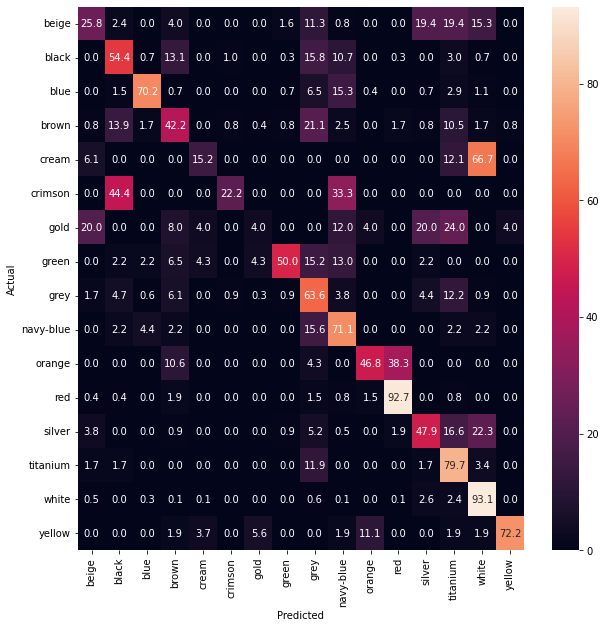

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-10.csv
Accuracy: %73.02
Precision mean: 0.5636
Recall mean: 0.5319


In [15]:
xyz_10 = get_model('untrainable/xyz-model-10.h5')

analyzer_10 = ErrorAnalyzer(model=xyz_10,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-10')

analyzer_10.plot_confusion_mat()
analyzer_10.evaluate_model()

## Eopch 15

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


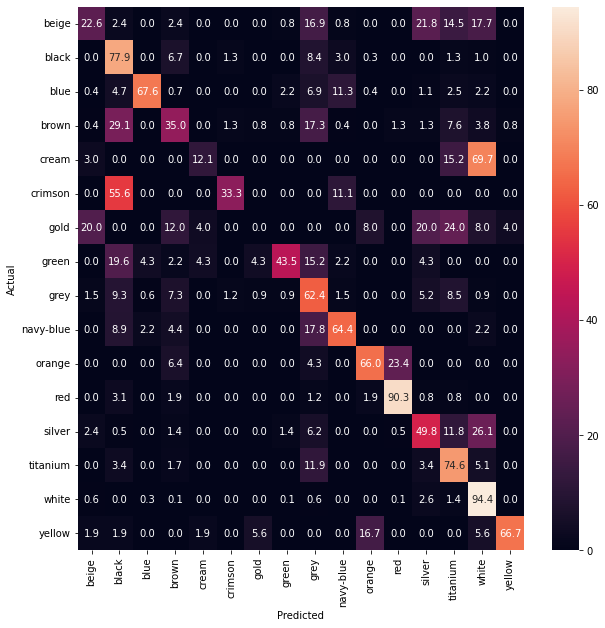

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-15.csv
Accuracy: %74.44
Precision mean: 0.5623
Recall mean: 0.5379


In [16]:
xyz_15 = get_model('untrainable/xyz-model-15.h5')

analyzer_15 = ErrorAnalyzer(model=xyz_15,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-15')

analyzer_15.plot_confusion_mat()
analyzer_15.evaluate_model()

## Epoch 20

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


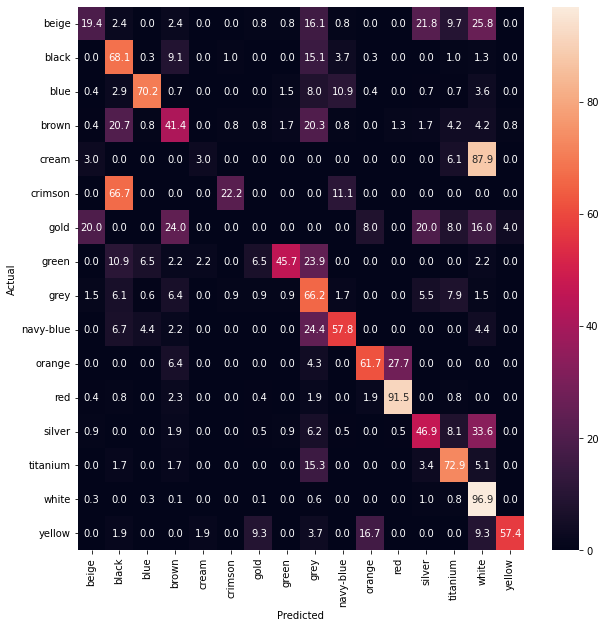

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-20.csv
Accuracy: %75.03999999999999
Precision mean: 0.56
Recall mean: 0.5133


In [17]:
xyz_20 = get_model('untrainable/xyz-model-20.h5')

analyzer_20 = ErrorAnalyzer(model=xyz_20,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-20')

analyzer_20.plot_confusion_mat()
analyzer_20.evaluate_model()

## Epoch 25

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


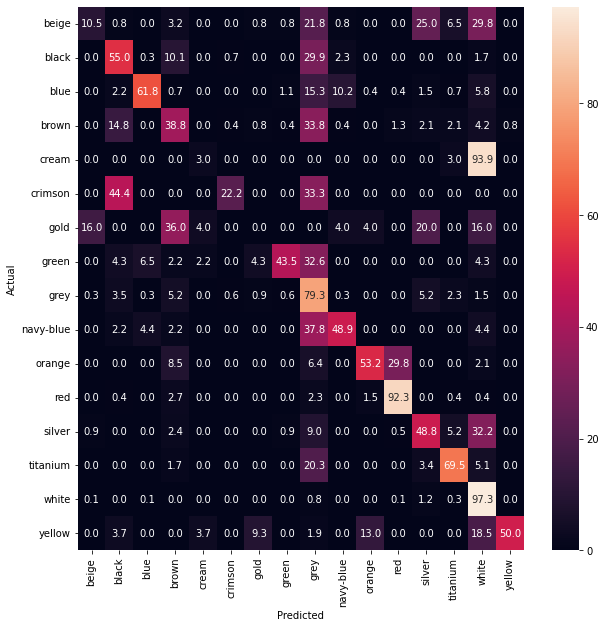

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-25.csv
Accuracy: %73.99
Precision mean: 0.5783
Recall mean: 0.4838


In [18]:
xyz_25 = get_model('untrainable/xyz-model-25.h5')

analyzer_25 = ErrorAnalyzer(model=xyz_25,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-25')

analyzer_25.plot_confusion_mat()
analyzer_25.evaluate_model()

## Epoch 30

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


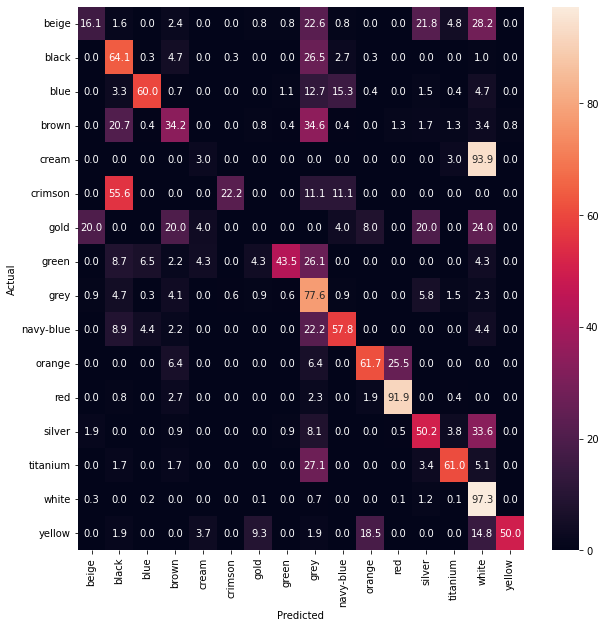

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-30.csv
Accuracy: %74.47
Precision mean: 0.5813
Recall mean: 0.4941


In [19]:
xyz_30 = get_model('untrainable/xyz-model-30.h5')

analyzer_30 = ErrorAnalyzer(model=xyz_30,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-30')

analyzer_30.plot_confusion_mat()
analyzer_30.evaluate_model()

## Epoch 35

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


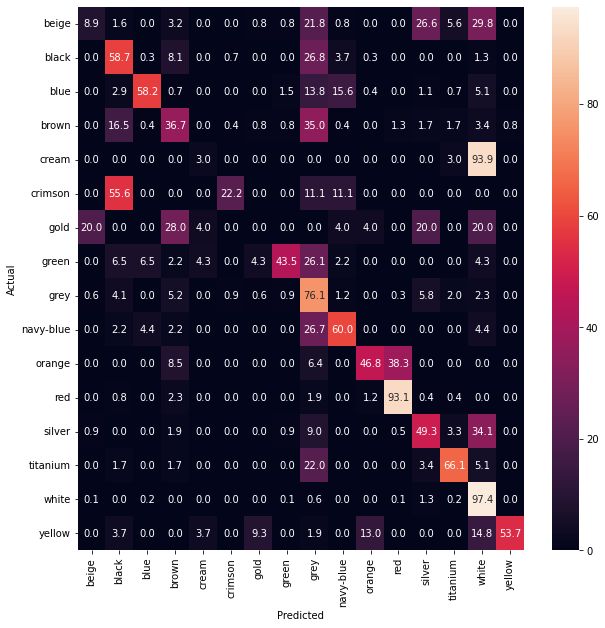

Calculateing error types...
Writing in log file...
All done. Check log file => xyz-35.csv
Accuracy: %73.7
Precision mean: 0.5586
Recall mean: 0.4836


In [21]:
xyz_35 = get_model('untrainable/xyz-model-35.h5')

analyzer_35 = ErrorAnalyzer(model=xyz_35,
                         ds=xyz_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='xyz-35')

analyzer_35.plot_confusion_mat()
analyzer_35.evaluate_model()

In [24]:
!zip -r logz.zip ./logs

updating: logs/ (stored 0%)
  adding: logs/statistic/ (stored 0%)
  adding: logs/statistic/xyz-25-conf-mat.npy (deflated 72%)
  adding: logs/statistic/xyz-30-conf-mat.npy (deflated 73%)
  adding: logs/statistic/xyz-20.csv (deflated 46%)
  adding: logs/statistic/xyz-10.csv (deflated 47%)
  adding: logs/statistic/xyz-10-conf-mat.npy (deflated 72%)
  adding: logs/statistic/images/ (stored 0%)
  adding: logs/statistic/images/xyz-20.jpg (deflated 16%)
  adding: logs/statistic/images/xyz-30.jpg (deflated 16%)
  adding: logs/statistic/images/xyz-35.jpg (deflated 15%)
  adding: logs/statistic/images/xyz-25.jpg (deflated 15%)
  adding: logs/statistic/images/xyz-15.jpg (deflated 15%)
  adding: logs/statistic/images/xyz-10.jpg (deflated 15%)
  adding: logs/statistic/xyz-35-conf-mat.npy (deflated 73%)
  adding: logs/statistic/xyz-15-conf-mat.npy (deflated 72%)
  adding: logs/statistic/xyz-20-conf-mat.npy (deflated 73%)
  adding: logs/statistic/xyz-15.csv (deflated 47%)
  adding: logs/statistic/xyz